In [1]:
import clustersupport as cs
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, make_spd_matrix

In [2]:
# load in boston data set
data = pd.DataFrame(load_boston()['data'], columns = load_boston()['feature_names'])

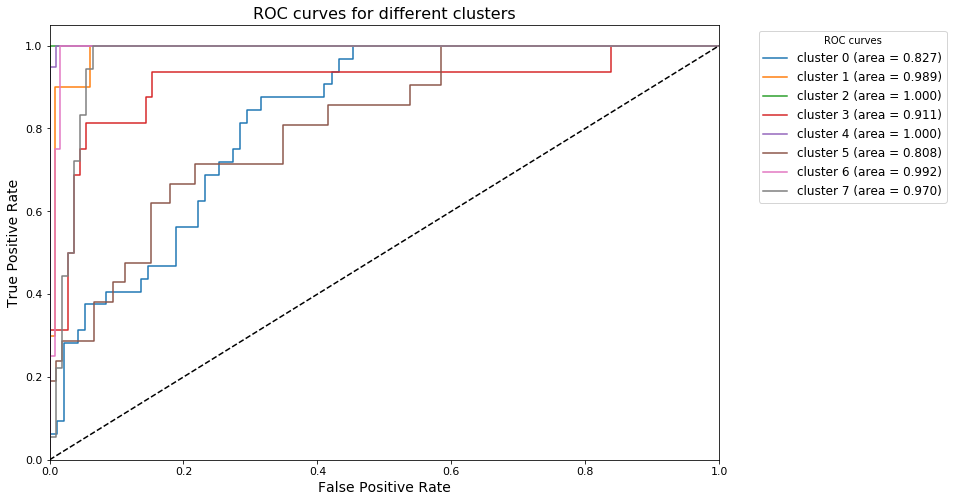

In [3]:
from sklearn.decomposition import PCA

# set seed and apply PCA on the data
data_reduced = PCA(n_components = 3, random_state = 123).fit_transform(data)

# fit to the reduced data and save the labels
reduced_fit_labels = cs.KMeans(n_clusters = 8, random_state = 123).fit(data_reduced).labels_

# run fit with the full data set
clustering = cs.KMeans(n_clusters = 8).fit(data)

# run classifier assessment with the reduced fit labels
clf_assessment = clustering.classifier_assessment(classifier = 'logreg', labels = reduced_fit_labels, roc_plot = True, n = 50, save_fig = True, random_state = 123)

In [4]:
# run logistic regression feature analysis
LR_example = cs.KMeans(n_clusters = 3).logistic_regression(X = data, output = 'p-value')

# round for readability
LR_example = LR_example.round(3)

In [5]:
LR_example.to_markdown()

'|   cluster |     0 |     1 |     2 |     3 |     4 |     5 |     6 |     7 |     8 |     9 |    10 |    11 |    12 |\n|----------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|\n|         0 | 0.271 | 0.001 | 0.205 | 0.395 | 0.098 | 0.365 | 0.155 | 0.192 | 0.288 | 0.128 | 0.369 | 0.388 | 0.354 |\n|         1 | 0.349 | 0.399 | 0.111 | 0.373 | 0.034 | 0.259 | 0.39  | 0.326 | 0.077 | 0.01  | 0.229 | 0.365 | 0.165 |\n|         2 | 0.399 | 0.015 | 0.26  | 0.399 | 0.211 | 0.392 | 0.104 | 0.1   | 0.396 | 0.309 | 0.308 | 0.389 | 0.292 |'

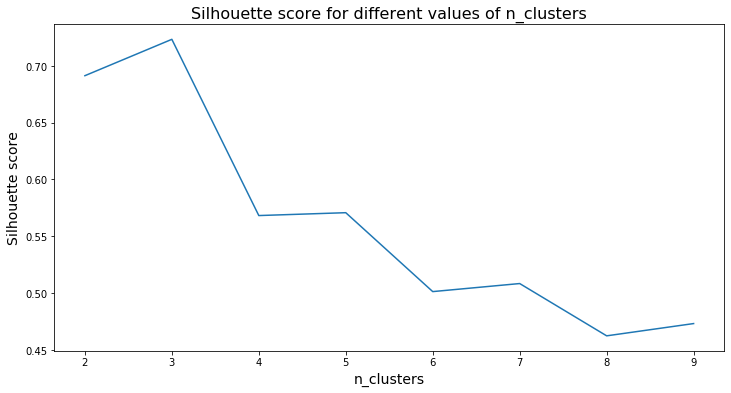

In [6]:
# build elbow plot for n_clusters compared to silhouette score
cs.KMeans().elbow_plot(X = data, parameter = 'n_clusters', parameter_range = range(2,10), metric = 'silhouette_score', save_fig = True)

In [7]:
# calculate gap statistic for values of n_clusters
gap_stat_example = cs.KMeans().gap_statistic(X = data, parameter = 'n_clusters', parameter_range = range(2,10), n_bootstraps = 50, random_state = 123)

Iteration for n_clusters = 2 completed.
Iteration for n_clusters = 3 completed.
Iteration for n_clusters = 4 completed.
Iteration for n_clusters = 5 completed.
Iteration for n_clusters = 6 completed.
Iteration for n_clusters = 7 completed.
Iteration for n_clusters = 8 completed.
Iteration for n_clusters = 9 completed.


In [8]:
gap_stat_example.to_markdown()

'|   n_clusters |   gap_statistic |   standard_error |\n|-------------:|----------------:|-----------------:|\n|            2 |         0.01415 |          0.00134 |\n|            3 |         0.04581 |          0.0019  |\n|            4 |         0.06136 |          0.0018  |\n|            5 |         0.06562 |          0.00212 |\n|            6 |         0.07478 |          0.00244 |\n|            7 |         0.118   |          0.0031  |\n|            8 |         0.11725 |          0.00321 |\n|            9 |         0.1476  |          0.00314 |'

Iteration for n_clusters = 2 completed.
Iteration for n_clusters = 3 completed.
Iteration for n_clusters = 4 completed.
Iteration for n_clusters = 5 completed.
Iteration for n_clusters = 6 completed.
Iteration for n_clusters = 7 completed.
Iteration for n_clusters = 8 completed.
Iteration for n_clusters = 9 completed.


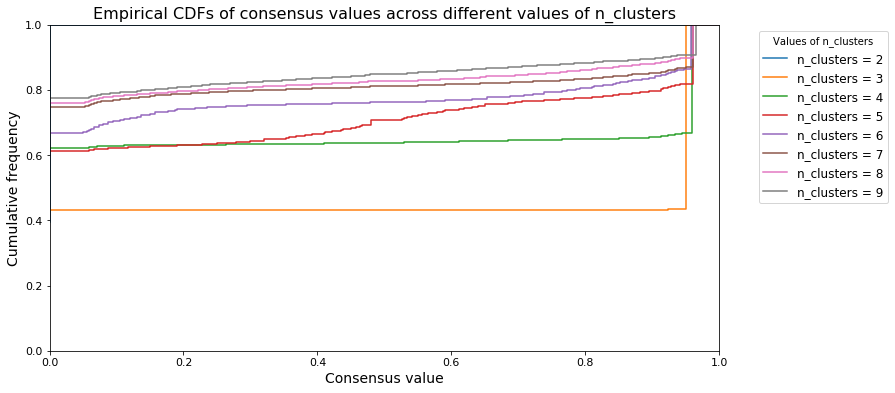

In [9]:
# run consensus clustering for values of n clusters
cc_example = cs.KMeans().consensus_cluster(X = data, parameter = 'n_clusters', parameter_range = range(2,10), n_bootstraps = 50, save_fig = True, random_state = 123)

In [10]:
cc_example.to_markdown()

'|   n_clusters |   proportion_unambiguous_clusterings |   area_under_cdf |\n|-------------:|-------------------------------------:|-----------------:|\n|            2 |                                1     |            0.396 |\n|            3 |                                0.999 |            0.431 |\n|            4 |                                0.975 |            0.64  |\n|            5 |                                0.827 |            0.704 |\n|            6 |                                0.87  |            0.766 |\n|            7 |                                0.918 |            0.81  |\n|            8 |                                0.902 |            0.827 |\n|            9 |                                0.896 |            0.845 |'